<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/Chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import glob
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
from zipfile import ZipFile
from google.colab import files
import os
     

In [9]:
file2 = "/content/drive/MyDrive/GAMES/GAMES.zip"


In [10]:
with ZipFile(file2, 'r') as zip:
    zip.printdir()
    zip.extractall()
     

File Name                                             Modified             Size
GAMES/                                         2022-12-07 22:59:44            0
GAMES/GAME1/                                   2022-12-07 23:00:00            0
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (1...e7-e5).jpg 2022-12-07 13:32:26        72733
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (1.e2-e4).jpg 2022-12-07 13:42:38        72653
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (10...Bf8xd6).jpg 2022-12-07 13:34:16        67733
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (10.e5xd6).jpg 2022-12-07 13:34:10        68634
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (11...Bc8-f5).jpg 2022-12-07 13:34:24        67088
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (11.Qd1xd4).jpg 2022-12-07 13:34:20        67050
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (12...0-0-0).jpg 2022-12-07 13:34:34        66860
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (12.Nb1-c3).jpg 2022-12-07 13:3

In [11]:
paths = os.listdir('GAMES')
paths
     

['GAME16',
 'GAME9',
 'GAME15',
 'GAME12',
 'GAME14',
 'GAME7',
 'GAME17',
 'GAME4',
 'GAME2',
 'GAME6',
 'GAME13',
 'GAME10',
 'GAME8',
 'GAME1',
 'GAME3',
 'GAME5',
 'GAME11']

In [12]:
k=[]
images = []
labels = []
m=[] 
a=[] 

In [13]:
for i in paths:
    path0 = '/content/GAMES/'+ str(i)
    for path in os.listdir(path0):
        path = '/content/GAMES/'+ str(i) + "/" + path
        #print(path)
        img = cv2.imread(path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(64,64),interpolation= cv2.INTER_AREA)
        img = img/255.0
        images.append(img)
        label = path.split("(")
        m.append(label)

19

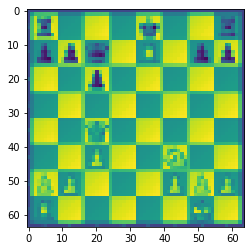

In [38]:
plt.imshow(images[7])
labels1[7]

In [24]:
labels1=[]
for y in range(int(len(m))):
      label1=m[y][1][:2]
      labels1.append(int(label1.split(".")[0]))
       

In [52]:
labels10 = np.array(labels1)
images10 = np.array(images).astype("float32")

In [53]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,Sequential

In [54]:
y=labels10
y = to_categorical(y)
X=images10

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [66]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(64,64,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='softmax'))
model.compile(optimizer = "adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [67]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
34/34 [==============================] - 18s 507ms/step - loss: 4.2595 - accuracy: 0.0168 - val_loss: 4.1329 - val_accuracy: 0.0224
Epoch 2/20
34/34 [==============================] - 17s 498ms/step - loss: 4.0907 - accuracy: 0.0271 - val_loss: 4.0265 - val_accuracy: 0.0224
Epoch 3/20
34/34 [==============================] - 19s 573ms/step - loss: 3.9523 - accuracy: 0.0355 - val_loss: 3.8097 - val_accuracy: 0.0261
Epoch 4/20
34/34 [==============================] - 17s 497ms/step - loss: 3.7810 - accuracy: 0.0514 - val_loss: 3.6585 - val_accuracy: 0.0485
Epoch 5/20
34/34 [==============================] - 17s 500ms/step - loss: 3.6698 - accuracy: 0.0448 - val_loss: 3.4985 - val_accuracy: 0.0709
Epoch 6/20
34/34 [==============================] - 17s 500ms/step - loss: 3.4761 - accuracy: 0.0635 - val_loss: 3.3697 - val_accuracy: 0.0746
Epoch 7/20
34/34 [==============================] - 17s 496ms/step - loss: 3.3462 - accuracy: 0.0831 - val_loss: 3.2236 - val_accuracy: 0.0970

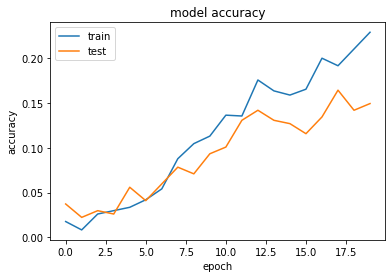

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

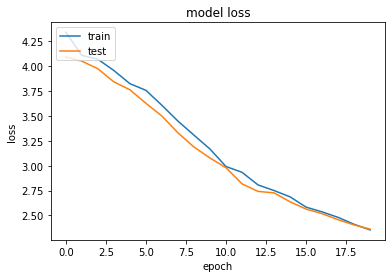

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()